<a href="https://colab.research.google.com/github/Brandon-Jeremy/AlphaOmega/blob/main/LichessLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [7]:
df = pd.read_csv('/content/Sept_20_analysis.csv')
# df = pd.read_csv('/content/clean_data (1).csv')
df.isnull().sum()

GAME                      0
BlackElo                  0
BlackRatingDiff         104
Date                      0
ECO                       0
Event                     0
Opening                   0
Result                    0
Site                      0
Termination               0
TimeControl               0
UTCTime                   0
WhiteElo                  0
WhiteRatingDiff         104
Black_elo_category        0
White_elo_category        0
starting_time            94
increment                94
Game_type                 1
Total_moves               1
Black_blunders            1
White_blunders            1
Black_mistakes            1
White_mistakes            1
Black_inaccuracies        1
White_inaccuracies        1
Black_inferior_moves      1
White_inferior_moves      1
Black_ts_moves            1
White_ts_moves            1
Black_ts_blunders         1
White_ts_blunders         1
Black_ts_mistakes         1
White_ts_mistake          1
Black_long_moves          1
White_long_moves    

In [8]:
df = df.dropna()
df.columns

Index(['GAME', 'BlackElo', 'BlackRatingDiff', 'Date', 'ECO', 'Event',
       'Opening', 'Result', 'Site', 'Termination', 'TimeControl', 'UTCTime',
       'WhiteElo', 'WhiteRatingDiff', 'Black_elo_category',
       'White_elo_category', 'starting_time', 'increment', 'Game_type',
       'Total_moves', 'Black_blunders', 'White_blunders', 'Black_mistakes',
       'White_mistakes', 'Black_inaccuracies', 'White_inaccuracies',
       'Black_inferior_moves', 'White_inferior_moves', 'Black_ts_moves',
       'White_ts_moves', 'Black_ts_blunders', 'White_ts_blunders',
       'Black_ts_mistakes', 'White_ts_mistake', 'Black_long_moves',
       'White_long_moves', 'Black_bad_long_moves', 'White_bad_long_moves',
       'Game_flips', 'Game_flips_ts'],
      dtype='object')

In [9]:
drop_columns = ['Event','Date','Site','UTCTime','TimeControl','GAME', 'ECO','starting_time','increment']
# Drop these columns to filter out unnecessary data
df = df.drop(drop_columns, axis = 1)

In [10]:
drop_row = ['Rules infraction','Abandoned']
mask = ~df['Termination'].isin(drop_row)

# Apply the mask to filter out rows with the specified values
df = df[mask]

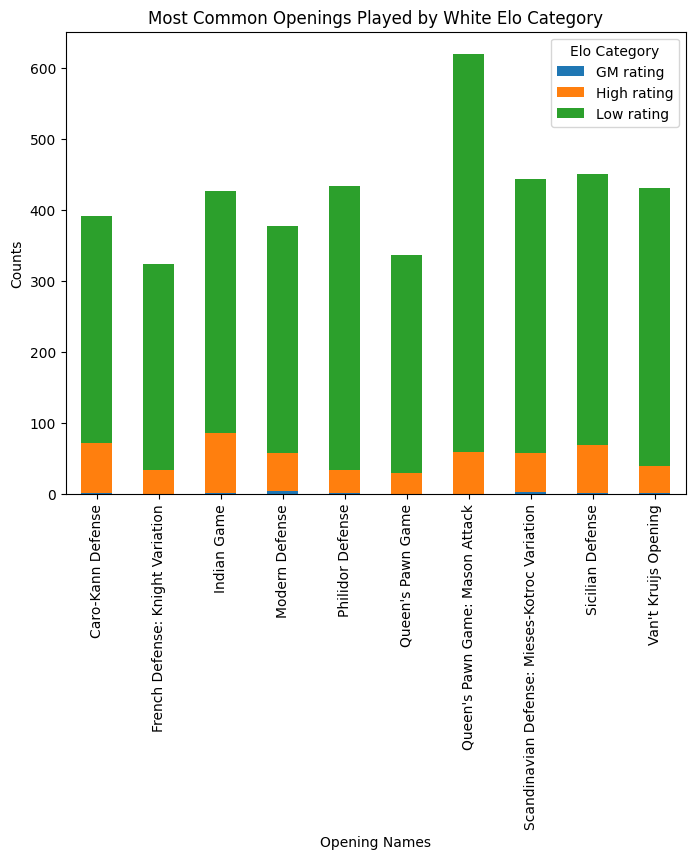

In [11]:
# Calculate the frequency of each opening
opening_counts = df['Opening'].value_counts()
top_openings_count = 10

# Select the top N most common openings
top_openings = opening_counts.head(top_openings_count).index

# Filter the data to include only the most common openings
filtered_data = df[df['Opening'].isin(top_openings)]

# Create a grouped bar plot
grouped_data = filtered_data.groupby(['Opening', 'White_elo_category']).size().unstack(fill_value=0)
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(8, 6))

# Customize labels and title
plt.xlabel('Opening Names')
plt.ylabel('Counts')
plt.title('Most Common Openings Played by White Elo Category')

# Show the plot
plt.legend(title='Elo Category')
plt.show()

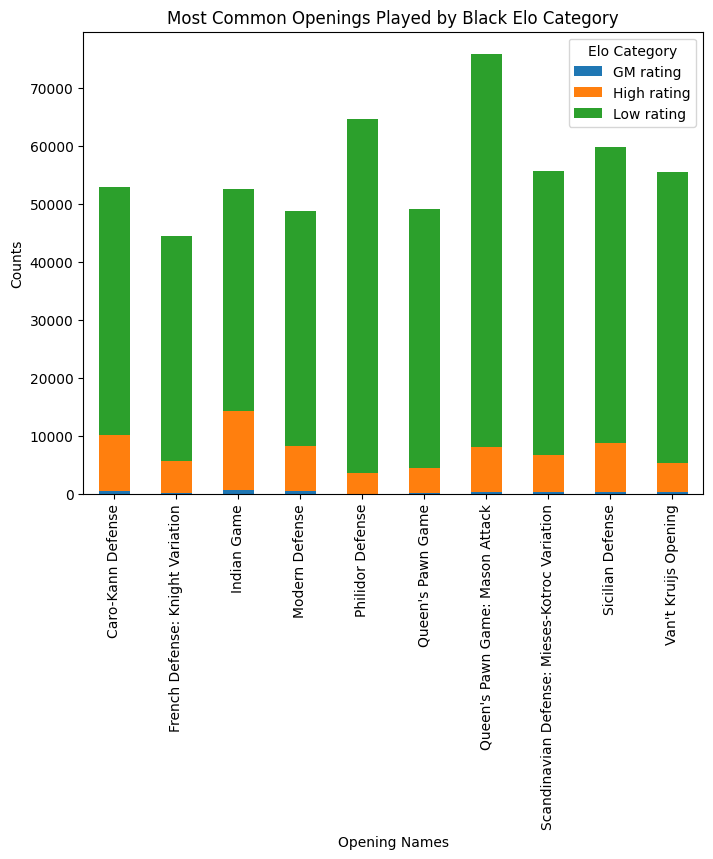

In [223]:
# Calculate the frequency of each opening
opening_counts = df['Opening'].value_counts()
opening_counts
top_openings_count = 10

# Select the top N most common openings
top_openings = opening_counts.head(top_openings_count).index

# Filter the data to include only the most common openings
filtered_data = df[df['Opening'].isin(top_openings)]

# Create a grouped bar plot
grouped_data = filtered_data.groupby(['Opening', 'Black_elo_category']).size().unstack(fill_value=0)
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(8, 6))

# Customize labels and title
plt.xlabel('Opening Names')
plt.ylabel('Counts')
plt.title('Most Common Openings Played by Black Elo Category')

# Show the plot
plt.legend(title='Elo Category')
plt.show()

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3716148 entries, 0 to 3739908
Data columns (total 31 columns):
 #   Column                Dtype  
---  ------                -----  
 0   BlackElo              int64  
 1   BlackRatingDiff       float64
 2   Opening               object 
 3   Result                object 
 4   Termination           object 
 5   WhiteElo              int64  
 6   WhiteRatingDiff       float64
 7   Black_elo_category    object 
 8   White_elo_category    object 
 9   Game_type             object 
 10  Total_moves           int64  
 11  Black_blunders        int64  
 12  White_blunders        int64  
 13  Black_mistakes        int64  
 14  White_mistakes        int64  
 15  Black_inaccuracies    int64  
 16  White_inaccuracies    int64  
 17  Black_inferior_moves  int64  
 18  White_inferior_moves  int64  
 19  Black_ts_moves        int64  
 20  White_ts_moves        int64  
 21  Black_ts_blunders     int64  
 22  White_ts_blunders     int64  
 23  Black_t

In [195]:
# Encode Categorical Data points to integer values

df['Result'].replace({'1/2-1/2':0,'1-0':1, '0-1':2}, inplace=True)
df['Termination'].replace({'Normal':1,'Time forfeit':0}, inplace=True)
df['Game_type'].replace({'Bullet':0,'Blitz':1,'Rapid':2,'Classical':3}, inplace=True)

In [225]:
groupings_learn = df['Game_flips'].groupby(df['White_elo_category']).count()

pd.DataFrame(groupings_learn).head()

,Game_flips
White_elo_category,
GM rating,39931
High rating,700340
Low rating,2975877


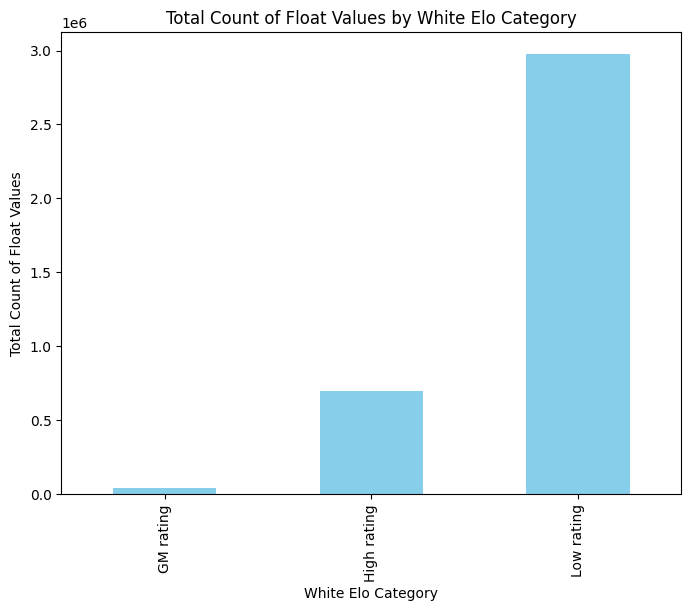

In [197]:
# Group and count the float values within each 'White_Elo_Category'
grouped_data = df['Game_flips'].groupby(df['White_elo_category']).count()

game_type = grouped_data.groupby(df['Game_type']).count()

# Create a bar plot
grouped_data.plot(kind='bar', figsize=(8, 6), color='skyblue')

# Customize labels and title
plt.xlabel('White Elo Category')
plt.ylabel('Total Count of Float Values')
plt.title('Total Count of Float Values by White Elo Category')

# Show the plot
plt.show()


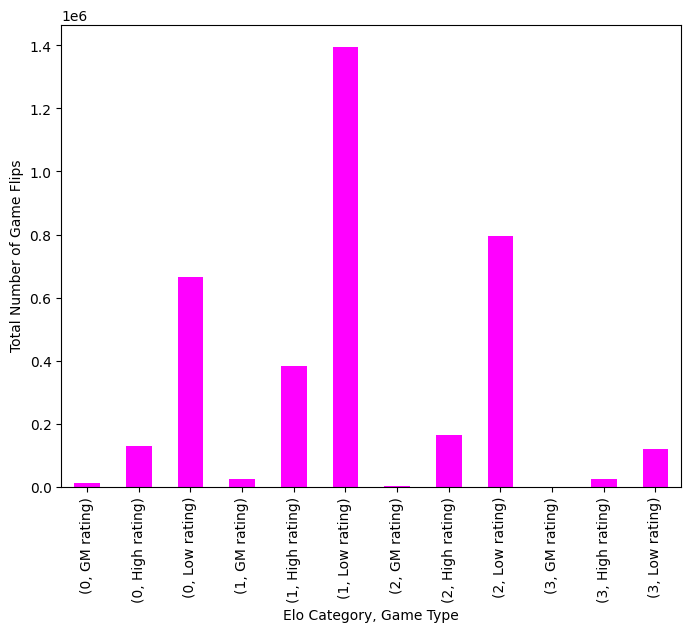

In [198]:
grouped_data_2 = df.groupby(['Game_type', 'White_elo_category'])['Game_flips'].count()
grouped_data_2.plot(kind='bar', figsize=(8, 6), color='magenta')
plt.xlabel("Elo Category, Game Type")
plt.ylabel("Total Number of Game Flips")
plt.show()

In [199]:
flips_by_type = pd.DataFrame(grouped_data_2)
flips_by_type.head()

Game_flips
Game_type White_elo_category            
0         GM rating                12662
          High rating             128297
          Low rating              664297
1         GM rating                24958
          High rating             383981

[[12662, 128297, 664297], [24958, 383981, 1396321], [2086, 162836, 796331], [225, 25226, 118928]]


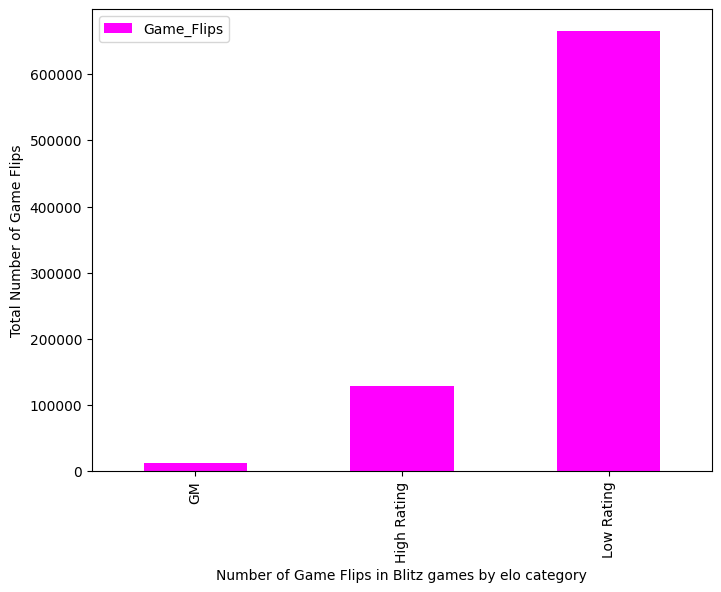

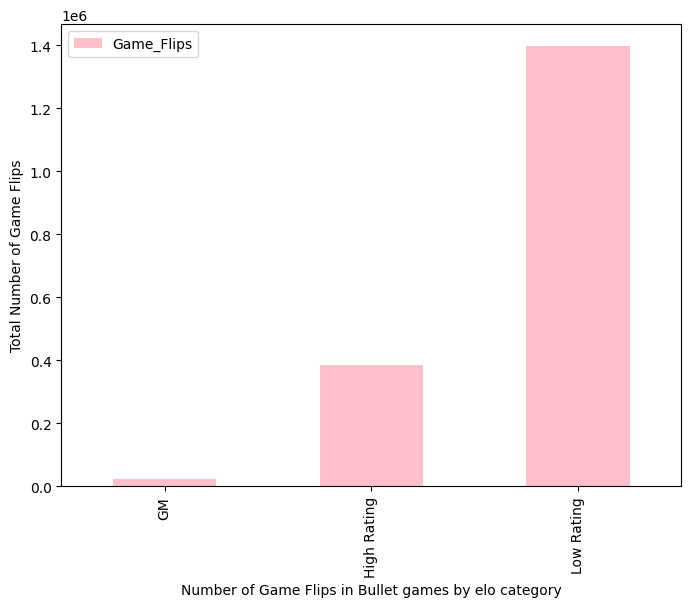

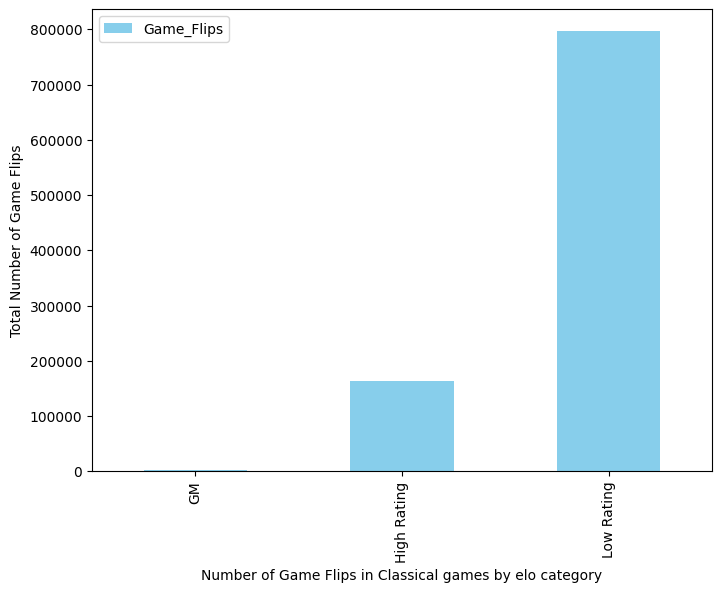

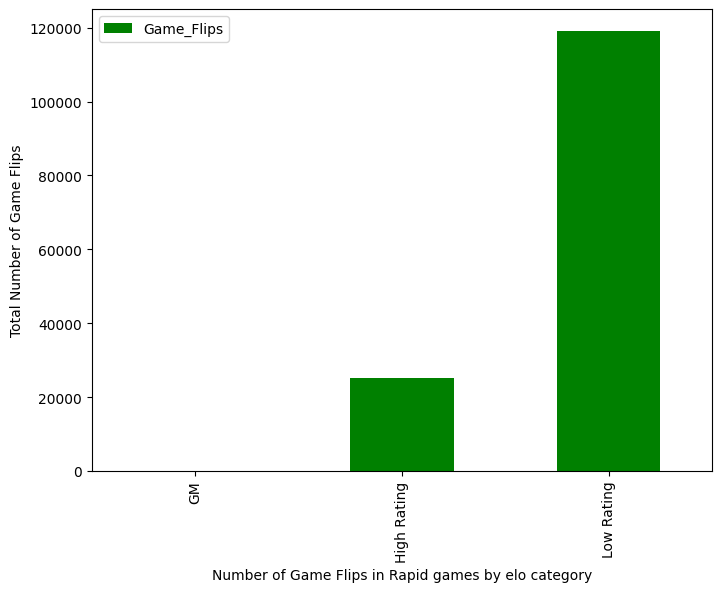

In [200]:

grouped_data_list = grouped_data_2.tolist()

games = [grouped_data_list[i:i + 3] for i in range(0, len(grouped_data_list), 3)]

print(games)

custom_labels = ['GM', 'High Rating', 'Low Rating']
colors = ['magenta','pink','skyblue','green']
game_type = ['Blitz','Bullet','Classical','Rapid']
i = 0
for game_subset in games:
    # Create a new DataFrame from the game_subset list
    subset_df = pd.DataFrame(game_subset, columns=['Game_Flips'])

    # Create a bar plot for this subset
    ax = subset_df.plot(kind='bar', figsize=(8, 6), color=colors[i])


    # Customize labels and title for each plot
    plt.xlabel(f"Number of Game Flips in {game_type[i]} games by elo category")
    plt.ylabel("Total Number of Game Flips")

    ax.set_xticklabels(custom_labels)

    # Show the plot for this game subset
    plt.show()
    i+=1
    print()

In [201]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3716148 entries, 0 to 3739908
Data columns (total 31 columns):
 #   Column                Dtype  
---  ------                -----  
 0   BlackElo              int64  
 1   BlackRatingDiff       float64
 2   Opening               object 
 3   Result                int64  
 4   Termination           int64  
 5   WhiteElo              int64  
 6   WhiteRatingDiff       float64
 7   Black_elo_category    object 
 8   White_elo_category    object 
 9   Game_type             int64  
 10  Total_moves           int64  
 11  Black_blunders        int64  
 12  White_blunders        int64  
 13  Black_mistakes        int64  
 14  White_mistakes        int64  
 15  Black_inaccuracies    int64  
 16  White_inaccuracies    int64  
 17  Black_inferior_moves  int64  
 18  White_inferior_moves  int64  
 19  Black_ts_moves        int64  
 20  White_ts_moves        int64  
 21  Black_ts_blunders     int64  
 22  White_ts_blunders     int64  
 23  Black_t

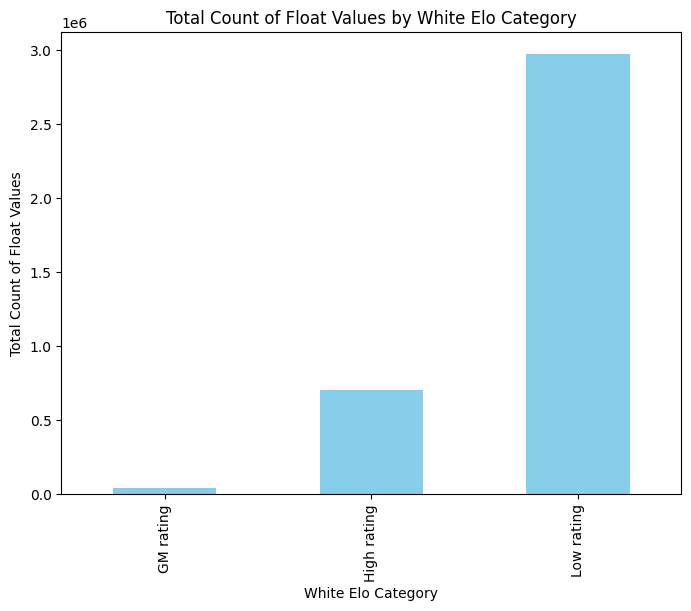

In [202]:
# Group and count the float values within each 'White_Elo_Category'
grouped_data_3 = df['Game_flips'].groupby(df['Black_elo_category']).count()

game_type = grouped_data_3.groupby(df['Game_type']).count()

# Create a bar plot
grouped_data_3.plot(kind='bar', figsize=(8, 6), color='skyblue')

# Customize labels and title
plt.xlabel('White Elo Category')
plt.ylabel('Total Count of Float Values')
plt.title('Total Count of Float Values by White Elo Category')

# Show the plot
plt.show()


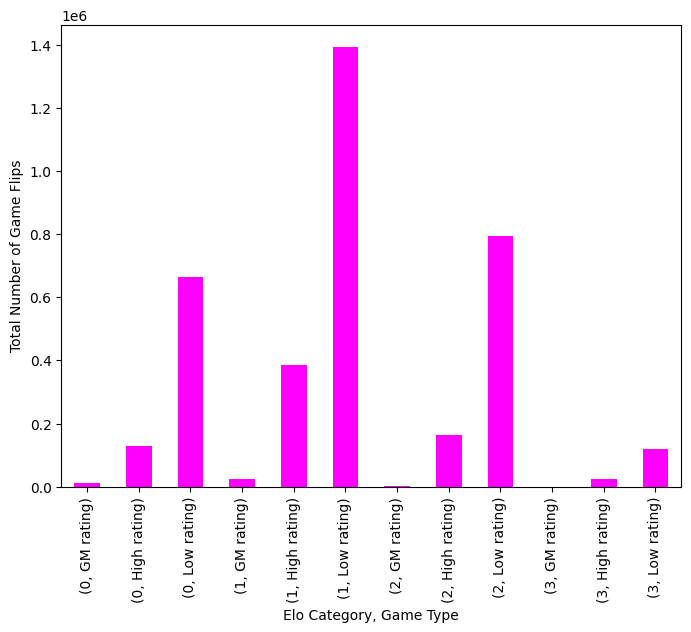

In [203]:
grouped_data_4 = df.groupby(['Game_type', 'Black_elo_category'])['Game_flips'].count()
grouped_data_4.plot(kind='bar', figsize=(8, 6), color='magenta')
plt.xlabel("Elo Category, Game Type")
plt.ylabel("Total Number of Game Flips")
plt.show()

[[12690, 128579, 663987], [25329, 384993, 1394938], [2150, 163434, 795669], [238, 25221, 118920]]


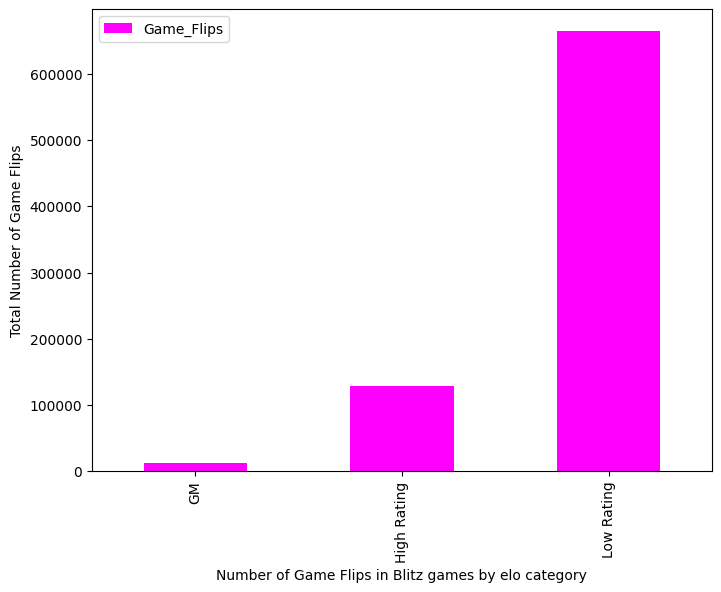

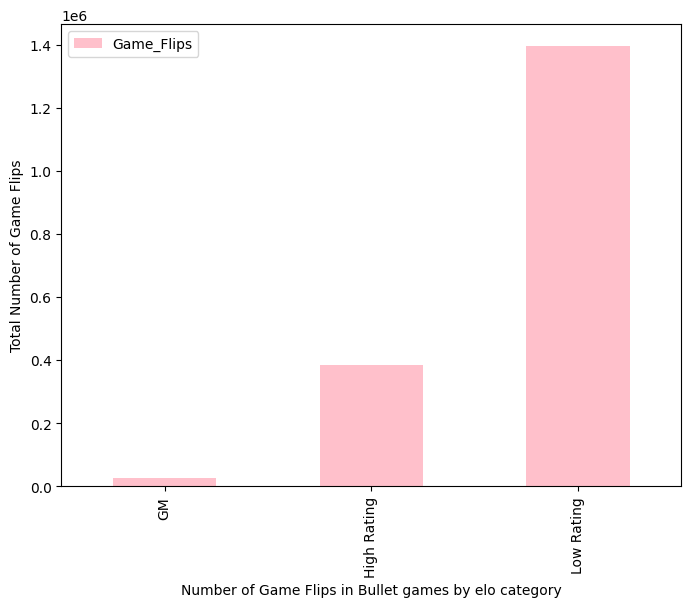

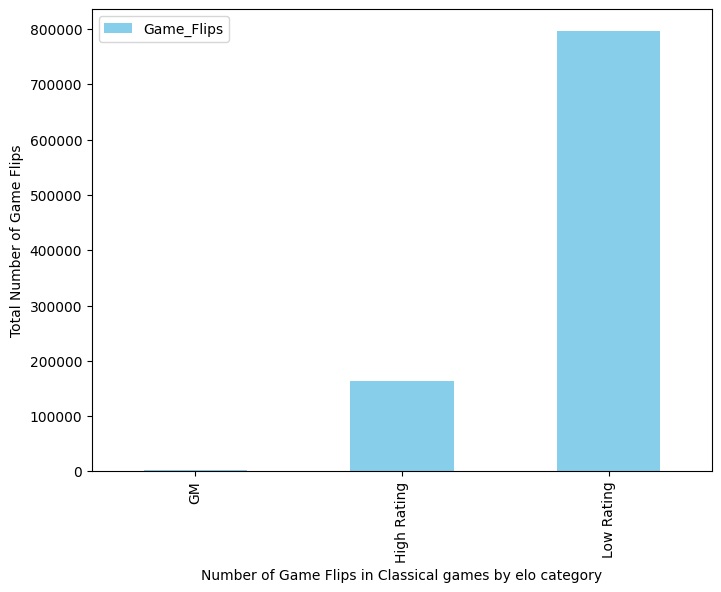

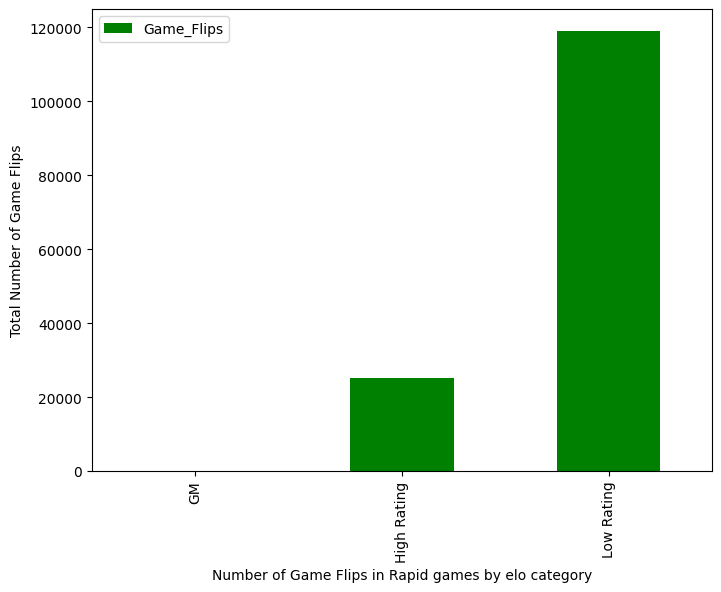

In [204]:

grouped_data_list_2 = grouped_data_4.tolist()

games = [grouped_data_list_2[i:i + 3] for i in range(0, len(grouped_data_list_2), 3)]

print(games)

custom_labels = ['GM', 'High Rating', 'Low Rating']
colors = ['magenta','pink','skyblue','green']
game_type = ['Blitz','Bullet','Classical','Rapid']
i = 0
for game_subset in games:
    # Create a new DataFrame from the game_subset list
    subset_df = pd.DataFrame(game_subset, columns=['Game_Flips'])

    # Create a bar plot for this subset
    ax = subset_df.plot(kind='bar', figsize=(8, 6), color=colors[i])


    # Customize labels and title for each plot
    plt.xlabel(f"Number of Game Flips in {game_type[i]} games by elo category")
    plt.ylabel("Total Number of Game Flips")

    ax.set_xticklabels(custom_labels)

    # Show the plot for this game subset
    plt.show()
    i+=1
    print()

# Conclusion

There is a clear relation between the amount of times the evaluation bar flips with the rating of a player, whether low rated, high rated, or a Grandmaster. This trend is consistent with all the game_types.

However, we must also notice that although the number of game flips is much lower for grandmaster and higher for lower elo players, we should also note that the number of grandmasters might be lower considering chess is a game available for everyone to play. Hence the liklihood a player is a grandmaster must be low

In [205]:
pd.DataFrame(df['White_elo_category'].value_counts())

,White_elo_category
Low rating,2975877
High rating,700340
GM rating,39931


In [206]:
pd.DataFrame(df['Black_elo_category'].value_counts())

,Black_elo_category
Low rating,2973514
High rating,702227
GM rating,40407


In [207]:
df.describe()

,BlackElo,BlackRatingDiff,Result,Termination,WhiteElo,WhiteRatingDiff,Game_type,Total_moves,Black_blunders,White_blunders,...,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts
count,3.716148e+06,3.716148e+06,3.716148e+06,3.716148e+06,3.716148e+06,3.716148e+06,3.716148e+06,3.716148e+06,3.716148e+06,3.716148e+06,...,3.716148e+06,3.716148e+06,3.716148e+06,3.716148e+06,3.716148e+06,3.716148e+06,3.716148e+06,3.716148e+06,3.716148e+06,3.716148e+06
mean,1.601658e+03,3.932272e+00,1.443017e+00,7.667811e-01,1.600893e+03,4.701215e+00,1.119682e+00,6.405972e+01,2.047405e+00,2.026441e+00,...,1.771100e-01,1.810046e-01,1.252773e-01,1.283431e-01,7.534030e-01,7.508089e-01,3.183318e-01,3.182844e-01,6.266133e+00,2.993113e-01
std,3.437970e+02,3.496008e+01,5.524921e-01,4.228805e-01,3.438231e+02,3.694146e+01,7.851394e-01,2.672704e+01,1.962491e+00,1.975771e+00,...,6.642311e-01,6.726253e-01,5.637640e-01,5.711766e-01,1.109493e+00,1.110849e+00,6.387171e-01,6.398154e-01,4.740058e+00,1.049461e+00
min,6.000000e+02,-9.760000e+02,0.000000e+00,0.000000e+00,6.000000e+02,-9.270000e+02,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.353000e+03,-6.000000e+00,1.000000e+00,1.000000e+00,1.352000e+03,-6.000000e+00,1.000000e+00,4.600000e+01,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,1.592000e+03,-1.000000e+00,1.000000e+00,1.000000e+00,1.591000e+03,1.000000e+00,1.000000e+00,5.900000e+01,2.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
75%,1.840000e+03,6.000000e+00,2.000000e+00,1.000000e+00,1.839000e+03,7.000000e+00,2.000000e+00,7.700000e+01,3.000000e+00,3.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00
max,3.957000e+03,9.990000e+02,2.000000e+00,1.000000e+00,3.958000e+03,9.980000e+02,3.000000e+00,3.530000e+02,3.200000e+01,3.600000e+01,...,2.000000e+01,2.000000e+01,1.800000e+01,1.600000e+01,3.300000e+01,3.100000e+01,1.400000e+01,1.100000e+01,8.300000e+01,4.400000e+01


In [226]:
flips_by_elo = df['Game_flips'].groupby(df['Black_elo_category']).aggregate('max')
pd.DataFrame(flips_by_elo).head()

,Game_flips
Black_elo_category,
GM rating,50
High rating,47
Low rating,83


In [227]:
blunders_by_elo = df['Black_blunders'].groupby(df['Black_elo_category']).mean()
pd.DataFrame(data=blunders_by_elo).head()

,Black_blunders
Black_elo_category,
GM rating,1.371347
High rating,1.554104
Low rating,2.173090


In [228]:
innaccuracy_by_elo = df['Black_inaccuracies'].groupby(df['Black_elo_category']).aggregate('mean')
pd.DataFrame(data=innaccuracy_by_elo).head()

,Black_inaccuracies
Black_elo_category,
GM rating,3.042072
High rating,3.065890
Low rating,2.855332


This doesn't match trends found in all games. In general higher rated players should make lower number of inaccuracies; however, the number may be inflated since high rated players tend to play games in more complicated positions hence the small mistakes made could be more likely to occur since mistakes/inaccuracies are judged by a chess engine - StockFish

In [229]:
mistake_by_elo = df['Black_mistakes'].groupby(df['Black_elo_category']).aggregate('mean')
pd.DataFrame(data=mistake_by_elo).head()

,Black_mistakes
Black_elo_category,
GM rating,2.720098
High rating,2.961289
Low rating,3.121748


In [230]:
gamelength_by_elo = df['Total_moves'].groupby(df['Black_elo_category']).aggregate('mean')
pd.DataFrame(data=gamelength_by_elo).head()

,Total_moves
Black_elo_category,
GM rating,81.270448
High rating,71.076615
Low rating,62.168724


# Conclusion

It is clear that the number of mistakes tend to increase as the elo category of the player decreases.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [13]:
X = df[['Black_blunders', 'Black_mistakes', 'Total_moves', 'Black_inaccuracies']].to_numpy()
y = df[['BlackElo']].to_numpy()

# Use double [] for proper multiple column selection in pandas
# y_train = df[['BlackElo']].to_numpy()
# This will create a 2D n cross 1 array where each value is a blackelo that corresponds to a row in x_train

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

reg = LinearRegression()
reg = reg.fit(X=X_train, y=y_train)

# Calculate the coefficients and intercept
coefficients = reg.coef_
intercept = reg.intercept_

predictions = reg.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Print summary information
print("Linear Regression Model Summary:")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Linear Regression Model Summary:
Coefficients: [[-4.60219249e+01 -6.74073991e+00  3.77972945e+00  2.28035830e-02]]
Intercept: [1467.66751735]
Mean Squared Error (MSE): 101271.73224756241
Root Mean Squared Error (RMSE): 318.2321986342086


In [20]:
# Create a random set of input values (replace with actual random values)
random_input = np.array([[5, 3, 70, 6]])

# Get a prediction
prediction = reg.predict(random_input)

# Print the prediction
print("Predicted BlackElo:", prediction[0])

#['Black_blunders', 'Black_mistakes', 'Total_moves', 'Black_inaccuracies']

Predicted BlackElo: [1482.05355586]


In [15]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,BlackElo,BlackRatingDiff,WhiteElo,WhiteRatingDiff,Total_moves,Black_blunders,White_blunders,Black_mistakes,White_mistakes,Black_inaccuracies,...,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts
BlackElo,1.000000,-0.035682,0.923232,-0.002152,0.208007,-0.187783,-0.173426,-0.001653,0.014743,0.076611,...,0.028456,0.021344,0.059262,0.048393,0.049928,0.056221,0.019759,0.028017,-0.055922,0.042339
BlackRatingDiff,-0.035682,1.000000,-0.006029,-0.275015,-0.008395,-0.095113,0.112355,-0.045152,0.078182,-0.060142,...,-0.066340,0.043576,-0.047882,0.038549,-0.066711,0.040999,-0.062312,0.052241,0.018233,-0.011203
WhiteElo,0.923232,-0.006029,1.000000,-0.036988,0.203568,-0.170266,-0.189815,0.013019,0.003381,0.086353,...,0.032148,0.017910,0.062122,0.047518,0.065851,0.034904,0.033831,0.011338,-0.058613,0.042992
WhiteRatingDiff,-0.002152,-0.275015,-0.036988,1.000000,-0.016562,0.100124,-0.094803,0.055767,-0.053687,0.045075,...,0.043699,-0.060267,0.022948,-0.045222,0.045600,-0.066569,0.044154,-0.063552,-0.008887,-0.009108
Total_moves,0.208007,-0.008395,0.203568,-0.016562,1.000000,0.274138,0.290321,0.387706,0.406431,0.407787,...,0.246391,0.237862,0.231397,0.217867,0.078291,0.076714,0.039445,0.038866,0.372022,0.289459
Black_blunders,-0.187783,-0.095113,-0.170266,0.100124,0.274138,1.000000,0.723606,0.274741,0.278164,0.102229,...,0.355785,0.280441,0.128911,0.118405,0.074774,0.025721,0.127317,0.059754,0.521004,0.295367
White_blunders,-0.173426,0.112355,-0.189815,-0.094803,0.290321,0.723606,1.000000,0.288451,0.285157,0.031940,...,0.286056,0.353224,0.127000,0.130614,0.030755,0.075483,0.067097,0.131227,0.532228,0.294802
Black_mistakes,-0.001653,-0.045152,0.013019,0.055767,0.387706,0.274741,0.288451,1.000000,0.604514,0.201770,...,0.195047,0.195861,0.295399,0.216588,0.068768,0.044649,0.141771,0.086253,0.568390,0.252941
White_mistakes,0.014743,0.078182,0.003381,-0.053687,0.406431,0.278164,0.285157,0.604514,1.000000,0.254789,...,0.207443,0.202664,0.225094,0.295639,0.048440,0.069594,0.087175,0.145280,0.580669,0.263794
Black_inaccuracies,0.076611,-0.060142,0.086353,0.045075,0.407787,0.102229,0.031940,0.201770,0.254789,1.000000,...,0.095626,0.093712,0.110580,0.120659,0.049484,0.033117,0.088252,0.040975,0.338910,0.149991
